In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
import seaborn as sb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("../data/selected_M_best100.csv")
df = df.drop_duplicates()
print(df.head())

   ILMN_1651296  ILMN_1654609  ILMN_1655864  ILMN_1656111  ILMN_1657898  \
0        9.3790       13.1600        9.1206       13.0567        8.9263   
1        9.3431       13.6183        9.6620       13.4208        8.6274   
2        8.7567       12.5893        8.9047       11.5663        8.3385   
3        8.7806       12.4219        8.7785       11.7575        8.2053   
4        8.5279       12.0954        8.4493       11.7753        8.2168   

   ILMN_1660357  ILMN_1660938  ILMN_1663416  ILMN_1663975  ILMN_1664861  ...  \
0        9.5279        9.2688       16.3292        8.6046        9.4549  ...   
1        9.5668        9.5245       16.4771        8.7923        9.5092  ...   
2        8.6186        8.7190       15.2230        8.3046        8.6895  ...   
3        8.4064        8.6284       15.1578        8.4242        8.5277  ...   
4        8.4192        8.4568       14.9286        8.1800        8.3119  ...   

   ILMN_2159384  ILMN_2203891  ILMN_2203896  ILMN_2245676  ILMN_2272

In [3]:
def map_results(inpt):
    if inpt == 'control':
        return 0;

    else:
        return 1;

In [4]:
df['Results'] = df['Results'].apply(map_results)
print(df.head())

   ILMN_1651296  ILMN_1654609  ILMN_1655864  ILMN_1656111  ILMN_1657898  \
0        9.3790       13.1600        9.1206       13.0567        8.9263   
1        9.3431       13.6183        9.6620       13.4208        8.6274   
2        8.7567       12.5893        8.9047       11.5663        8.3385   
3        8.7806       12.4219        8.7785       11.7575        8.2053   
4        8.5279       12.0954        8.4493       11.7753        8.2168   

   ILMN_1660357  ILMN_1660938  ILMN_1663416  ILMN_1663975  ILMN_1664861  ...  \
0        9.5279        9.2688       16.3292        8.6046        9.4549  ...   
1        9.5668        9.5245       16.4771        8.7923        9.5092  ...   
2        8.6186        8.7190       15.2230        8.3046        8.6895  ...   
3        8.4064        8.6284       15.1578        8.4242        8.5277  ...   
4        8.4192        8.4568       14.9286        8.1800        8.3119  ...   

   ILMN_2159384  ILMN_2203891  ILMN_2203896  ILMN_2245676  ILMN_2272

In [5]:

df.describe()

,ILMN_1651296,ILMN_1654609,ILMN_1655864,ILMN_1656111,ILMN_1657898,ILMN_1660357,ILMN_1660938,ILMN_1663416,ILMN_1663975,ILMN_1664861,...,ILMN_2159384,ILMN_2203891,ILMN_2203896,ILMN_2245676,ILMN_2272857,ILMN_2320853,ILMN_2342250,ILMN_2359627,ILMN_2406410,Results
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,8.963658,12.634358,8.840350,11.874034,8.361906,8.984964,8.824249,15.757651,8.442949,8.970473,...,9.127508,9.202827,9.943714,9.048387,8.906776,13.466810,8.241331,8.425519,11.200771,0.707143
std,0.507967,0.787855,0.551345,0.896543,0.348476,0.548652,0.428465,0.639390,0.312019,0.847736,...,0.610215,0.657520,0.937709,0.499249,0.424639,0.757236,0.292743,0.383808,0.666722,0.456707
min,8.172100,9.570600,7.867800,8.669400,7.708100,8.049400,7.884700,12.853500,7.914500,7.722100,...,7.852400,8.306700,8.039000,7.992200,8.108100,10.752000,7.699200,7.761100,9.291300,0.000000
25%,8.595050,12.086050,8.413500,11.294975,8.128750,8.536025,8.474475,15.253375,8.202875,8.260800,...,8.679300,8.774550,9.309425,8.640600,8.607750,12.979300,8.026950,8.161925,10.811500,0.000000
50%,8.837400,12.694350,8.688850,11.907700,8.254400,8.911400,8.809150,16.006400,8.405250,8.777450,...,9.066750,9.008250,9.789650,9.046050,8.758050,13.661150,8.178500,8.335400,11.251850,1.000000
75%,9.262500,13.167725,9.193275,12.534300,8.539750,9.307150,9.102900,16.210800,8.635275,9.596200,...,9.559950,9.392600,10.440125,9.346525,9.234700,14.001500,8.414075,8.562700,11.645875,1.000000
max,10.410700,13.997800,10.372400,13.481200,9.626600,10.658800,9.881100,16.639100,9.186400,10.767600,...,10.433700,11.892100,13.061800,10.197800,10.149800,14.683300,9.326000,9.909400,12.640700,1.000000


In [6]:
df_features = list(df.columns)
print(df_features)

['ILMN_1651296', 'ILMN_1654609', 'ILMN_1655864', 'ILMN_1656111', 'ILMN_1657898', 'ILMN_1660357', 'ILMN_1660938', 'ILMN_1663416', 'ILMN_1663975', 'ILMN_1664861', 'ILMN_1667500', 'ILMN_1668535', 'ILMN_1670218', 'ILMN_1670638', 'ILMN_1670817', 'ILMN_1671005', 'ILMN_1671067', 'ILMN_1672295', 'ILMN_1674661', 'ILMN_1677756', 'ILMN_1679045', 'ILMN_1680139', 'ILMN_1687526', 'ILMN_1687884', 'ILMN_1689400', 'ILMN_1691860', 'ILMN_1692169', 'ILMN_1693635', 'ILMN_1694671', 'ILMN_1695382', 'ILMN_1698404', 'ILMN_1701962', 'ILMN_1702691', 'ILMN_1704014', 'ILMN_1704335', 'ILMN_1706859', 'ILMN_1707339', 'ILMN_1707631', 'ILMN_1713189', 'ILMN_1713764', 'ILMN_1715771', 'ILMN_1717229', 'ILMN_1718977', 'ILMN_1725707', 'ILMN_1729832', 'ILMN_1732141', 'ILMN_1733998', 'ILMN_1734410', 'ILMN_1738116', 'ILMN_1740875', 'ILMN_1743204', 'ILMN_1745788', 'ILMN_1755643', 'ILMN_1755911', 'ILMN_1756937', 'ILMN_1758687', 'ILMN_1760280', 'ILMN_1762080', 'ILMN_1763364', 'ILMN_1765725', 'ILMN_1767168', 'ILMN_1768391', 'ILMN_1

In [7]:
x = df.drop(["Results"], axis =1);
y = df["Results"]
print(y.value_counts())

1    99
0    41
Name: Results, dtype: int64


(array([41.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 99.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

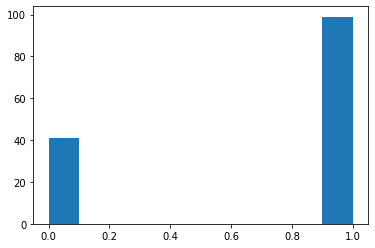

In [8]:
plt.hist(y)

1    58
0    41
Name: Results, dtype: int64


(array([41.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 58.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

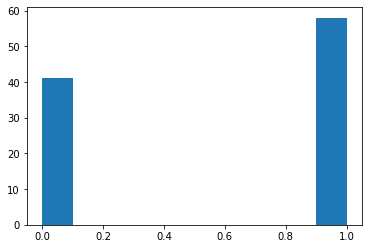

In [9]:
# transform the dataset
under = RandomUnderSampler(sampling_strategy= 0.7)
X, Y = under.fit_resample(x, y)
print(Y.value_counts())
plt.hist(Y)

0    58
1    58
Name: Results, dtype: int64


(array([58.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 58.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

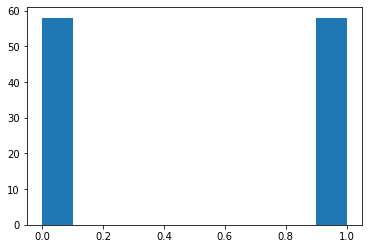

In [10]:
smt = SMOTE()
X, Y = smt.fit_resample(X,Y)
print(Y.value_counts())
plt.hist(Y)

In [11]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=41)

Accuracy(%) =  79.16666666666666
Number of mislabeled points : 5 / 24
F1 Score (%) =  80.0
Precision (%) =  71.42857142857143
Recall (%) =  90.9090909090909


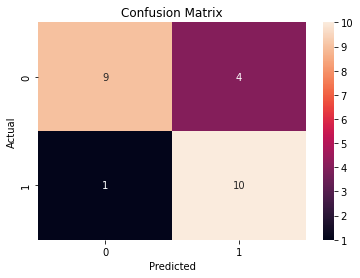

In [12]:
# creating a Nave Bayers classifier
model = svm.SVC()

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
model.fit(X_train, Y_train)

# performing predictions on the test dataset
Y_pred = model.predict(X_test)



accuracy = sm.accuracy_score(Y_test, Y_pred)
precision = sm.precision_score(Y_test, Y_pred)
recall = sm.recall_score(Y_test, Y_pred)
f1_score = sm.f1_score(Y_test, Y_pred)
print("Accuracy(%) = ", accuracy*100)
print("Number of mislabeled points :",(Y_test != Y_pred).sum(),"/" ,  X_test.shape[0])
print("F1 Score (%) = ",f1_score*100)
print("Precision (%) = ",precision *100)
print("Recall (%) = ",recall*100)

cf_matrix = confusion_matrix(Y_test, Y_pred)
    

ax= plt.subplot()
sb.heatmap(cf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted');
ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 


Accuracy(%) =  83.33333333333334
Number of mislabeled points : 4 / 24
F1 Score (%) =  81.81818181818183
Precision (%) =  81.81818181818183
Recall (%) =  81.81818181818183


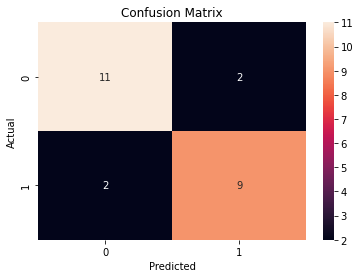

In [14]:
# creating a Nave Bayers classifier
model_2 = svm.SVC(kernel = "poly")

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
model_2.fit(X_train, Y_train)

# performing predictions on the test dataset
Y_pred_2 = model_2.predict(X_test)



accuracy_2 = sm.accuracy_score(Y_test, Y_pred_2)
precision_2 = sm.precision_score(Y_test, Y_pred_2)
recall_2 = sm.recall_score(Y_test, Y_pred_2)
f1_score_2 = sm.f1_score(Y_test, Y_pred_2)
print("Accuracy(%) = ", accuracy_2*100)
print("Number of mislabeled points :",(Y_test != Y_pred_2).sum(),"/" ,  X_test.shape[0])
print("F1 Score (%) = ",f1_score_2*100)
print("Precision (%) = ",precision_2 *100)
print("Recall (%) = ",recall_2*100)

cf_matrix_2 = confusion_matrix(Y_test, Y_pred_2)
    

ax= plt.subplot()
sb.heatmap(cf_matrix_2, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted');
ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 

Accuracy(%) =  79.16666666666666
Number of mislabeled points : 5 / 24
F1 Score (%) =  80.0
Precision (%) =  71.42857142857143
Recall (%) =  90.9090909090909


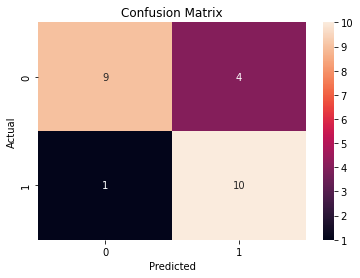

In [32]:
# creating a Nave Bayers classifier
model_3 = svm.SVC(kernel="rbf")

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
model_3.fit(X_train, Y_train)

# performing predictions on the test dataset
Y_pred_3 = model_3.predict(X_test)



accuracy_3 = sm.accuracy_score(Y_test, Y_pred_3)
precision_3 = sm.precision_score(Y_test, Y_pred_3)
recall_3 = sm.recall_score(Y_test, Y_pred_3)
f1_score_3 = sm.f1_score(Y_test, Y_pred_3)
print("Accuracy(%) = ", accuracy_3*100)
print("Number of mislabeled points :",(Y_test != Y_pred_3).sum(),"/" ,  X_test.shape[0])
print("F1 Score (%) = ",f1_score_3*100)
print("Precision (%) = ",precision_3 *100)
print("Recall (%) = ",recall_3*100)

cf_matrix_3 = confusion_matrix(Y_test, Y_pred_3)
    

ax= plt.subplot()
sb.heatmap(cf_matrix_3, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted');
ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 
